In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

pd.set_option('max_columns',100)
hotel=pd.read_csv('hotel_bookings.csv')
hotel.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
temp=hotel.iloc[:,[0,2,7,8,9,10,11,12,14,15,16]]


In [3]:
temp.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest'],
      dtype='object')

In [4]:
temp.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119390 non-null  object 
 1   lead_time                119390 non-null  int64  
 2   stays_in_weekend_nights  119390 non-null  int64  
 3   stays_in_week_nights     119390 non-null  int64  
 4   adults                   119390 non-null  int64  
 5   children                 119386 non-null  float64
 6   babies                   119390 non-null  int64  
 7   meal                     119390 non-null  object 
 8   market_segment           119390 non-null  object 
 9   distribution_channel     119390 non-null  object 
 10  is_repeated_guest        119390 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 10.0+ MB


C:\Users\ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [5]:
temp = temp.dropna()
temp.isnull().sum()

hotel                      0
lead_time                  0
stays_in_weekend_nights    0
stays_in_week_nights       0
adults                     0
children                   0
babies                     0
meal                       0
market_segment             0
distribution_channel       0
is_repeated_guest          0
dtype: int64

In [6]:
temp.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   hotel                    119386 non-null  object 
 1   lead_time                119386 non-null  int64  
 2   stays_in_weekend_nights  119386 non-null  int64  
 3   stays_in_week_nights     119386 non-null  int64  
 4   adults                   119386 non-null  int64  
 5   children                 119386 non-null  float64
 6   babies                   119386 non-null  int64  
 7   meal                     119386 non-null  object 
 8   market_segment           119386 non-null  object 
 9   distribution_channel     119386 non-null  object 
 10  is_repeated_guest        119386 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 10.9+ MB


C:\Users\ankit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [7]:
label_encoder = LabelEncoder()
temp.loc[:,'hotel'] = label_encoder.fit_transform(temp['hotel'])
temp.loc[:,'meal'] = label_encoder.fit_transform(temp['meal'])
temp.loc[:,'market_segment'] = label_encoder.fit_transform(temp['market_segment'])
temp.loc[:,'distribution_channel'] = label_encoder.fit_transform(temp['distribution_channel'])


In [8]:
temp.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest'],
      dtype='object')

In [9]:
cat_data = temp[['hotel','meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest']]

In [13]:

enc = OneHotEncoder(sparse=False)
enc_df = pd.DataFrame(enc.fit_transform(cat_data))


In [14]:
enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
enc_df.columns = enc.get_feature_names(cat_data.columns)
enc_df.head()

,hotel_0,hotel_1,meal_0,meal_1,meal_2,meal_3,meal_4,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,is_repeated_guest_0,is_repeated_guest_1
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [17]:
dataset =temp.copy()
dataset = dataset.drop('hotel',axis=1)
dataset = dataset.drop('meal',axis=1)
dataset = dataset.drop('distribution_channel',axis=1)
dataset = dataset.drop('market_segment',axis=1)
dataset = dataset.drop('is_repeated_guest',axis=1)


In [18]:
enc_df = enc_df.reset_index(drop=True)
dataset = dataset.reset_index(drop=True)
dataset=pd.concat([dataset,enc_df],axis=1)
print(dataset.shape)
dataset.head()

(119386, 27)


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,hotel_0,hotel_1,meal_0,meal_1,meal_2,meal_3,meal_4,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,is_repeated_guest_0,is_repeated_guest_1
0,342,0,0,2,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,737,0,0,2,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,7,0,1,1,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13,0,1,1,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,14,0,2,2,0.0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [19]:
dataset.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'hotel_0', 'hotel_1', 'meal_0',
       'meal_1', 'meal_2', 'meal_3', 'meal_4', 'market_segment_0',
       'market_segment_1', 'market_segment_2', 'market_segment_3',
       'market_segment_4', 'market_segment_5', 'market_segment_6',
       'distribution_channel_0', 'distribution_channel_1',
       'distribution_channel_2', 'distribution_channel_3',
       'distribution_channel_4', 'is_repeated_guest_0', 'is_repeated_guest_1'],
      dtype='object')

In [20]:
dataset.shape

(119386, 27)

In [21]:
dataset.isnull().sum().sum()

0

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:

scaler = StandardScaler()
X = scaler.fit_transform(dataset)
X = pd.DataFrame(X, columns = dataset.columns)

In [27]:
X.shape

(119386, 27)

In [25]:
X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,hotel_0,hotel_1,meal_0,meal_1,meal_2,meal_3,meal_4,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,is_repeated_guest_0,is_repeated_guest_1
0,2.227016,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
1,5.923343,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
2,-0.907844,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
3,-0.851697,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,4.641867,-0.343577,-0.446044,-0.504469,-0.947485,4.108550,-0.373927,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
4,-0.842340,-0.928892,-0.262178,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,-0.343577,-0.446044,-0.504469,1.055426,-0.243395,-0.373927,-0.04024,0.468874,-0.002894,0.181564,-0.181564


In [26]:
#Perform eigendecomposition on  matrix
cov_mat = X.corr()
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.62728302e-01 -7.39758096e-02  1.15753892e-01 -3.83825293e-01
   7.65462735e-04  4.51038764e-03  5.31469464e-03  8.14748785e-02
  -3.71578975e-01 -4.87512164e-01 -1.16061338e-01  5.18754644e-01
  -3.04895495e-01  1.99658600e-02 -1.52376434e-01 -6.97313331e-02
   1.35783541e-02  1.56285125e-02  6.56942439e-02  7.31941723e-02
   9.78806365e-02  3.46406255e-02  1.97961594e-15 -3.78096554e-15
   1.76383373e-17 -1.04482560e-17 -7.77554872e-18]
 [ 7.89004899e-02 -2.60802969e-01  1.63971847e-01  9.43521955e-02
   9.76780680e-02 -1.03677094e-02  1.64790791e-02  1.01272015e-01
  -5.53824980e-01  3.80687346e-01  2.41053600e-01 -2.49804346e-01
  -4.75941988e-01 -7.73959587e-02  1.99202535e-01  7.73767991e-02
  -8.55918972e-02 -2.96885497e-02  7.82833991e-02 -3.44894622e-02
   3.58225857e-02  5.14698783e-02 -1.77128799e-15 -3.60480550e-16
  -5.13504377e-16 -4.50561051e-17 -6.63958187e-17]
 [ 7.58743915e-02 -2.89749807e-01  1.90180177e-01  6.44470980e-02
   1.12141945e-01  1.33413

In [28]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs[:10]:
    print(i[0])

Eigenvalues in descending order:
3.5775257508898552
2.633631780432997
2.1792103800339127
1.9478558061246907
1.779380720275371
0.11127752875618892
0.19930968694225998
1.4591655645264137
0.4733889449360249
0.5605532928217263


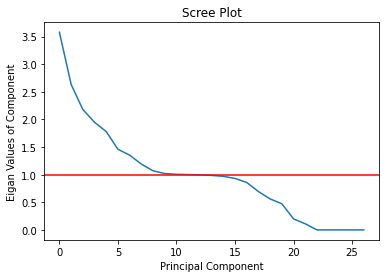

12

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
eig_vals = abs(np.sort(-eig_vals))
plt.plot(eig_vals)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigan Values of Component')
plt.axhline(y=1,color='r',linestyle='-')
plt.show()
(eig_vals>1).sum()

In [33]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=15) # we should take 12 but for illustration we are taking higher than 12

X1=pca.fit_transform(X)
X1 = pd.DataFrame(X1)


columns = []
for i in range(1,(len(X1.columns)+1)):
    columns.append('PCA_'+str(X1.columns[i-1]+1))

X1.columns = columns
X1.head()



,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-3.214102,2.426652,2.294291,-1.119102,-0.080239,-0.061406,-0.810775,-0.395409,0.627925,-0.619387,-0.403523,0.230625,-0.059070,-0.477243,0.455111
1,-2.612605,2.700091,1.866426,-2.537846,-0.083069,0.239752,-1.239775,0.731584,1.191159,-0.677155,-0.531566,0.592423,-0.329620,-0.234416,0.505301
2,-3.930008,2.091044,2.387574,0.011006,-0.040576,-0.494852,-0.152100,-1.353640,-0.368492,-0.482686,0.029089,0.020622,-0.041905,-0.607783,0.170042
3,-4.570597,-1.630190,-2.544995,0.348721,-0.880133,-4.263494,1.282345,-0.824556,0.776402,-0.150997,-0.516116,0.127568,0.142945,0.479769,-0.649397
4,0.132592,0.499571,-0.382614,1.494984,-1.244362,-0.382147,-0.919892,-1.491391,0.042993,-0.198496,-0.036875,-0.082832,0.055980,-0.456205,0.122987


In [34]:

print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.13250095 0.09754192 0.0807115  0.07214281 0.06590299 0.05404317
 0.05010811 0.04413492 0.03959812 0.03779823 0.03727572 0.03708607
 0.03686553 0.0365298  0.03591749]
Cumulative Prop. Variance Explained:  [0.13250095 0.23004287 0.31075437 0.38289717 0.44880016 0.50284333
 0.55295145 0.59708637 0.63668449 0.67448272 0.71175845 0.74884452
 0.78571005 0.82223985 0.85815734]


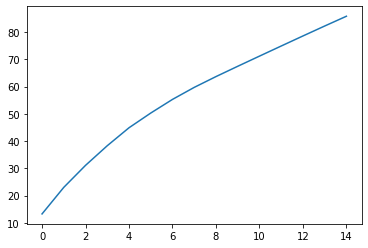

In [35]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)



In [36]:
loadings = pca.components_
num_pc = pca.n_features_

pc_list = ["PCA_" +str(i) for i in list(range(1,num_pc+1))]
loadings_df= pd.DataFrame.from_dict((dict(zip(pc_list,loadings))))

loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
variable,,,,,,,,,,,,,,,
lead_time,0.162728,0.073976,-0.115754,-0.383825,-0.000765,0.081475,-0.116061,0.304895,0.152376,-0.015629,-0.034641,0.097881,-0.073194,0.065694,0.013578
stays_in_weekend_nights,0.078900,0.260803,-0.163972,0.094352,-0.097678,0.101272,0.241054,0.475942,-0.199203,0.029689,-0.051470,0.035823,0.034489,0.078283,-0.085592
stays_in_week_nights,0.075874,0.289750,-0.190180,0.064447,-0.112142,0.100476,0.239677,0.451672,-0.165271,0.010521,-0.062607,0.034584,0.028918,0.087500,-0.086388
adults,0.142229,0.148025,0.098432,0.061924,-0.055626,0.133627,-0.098034,0.138510,0.250316,-0.047612,-0.206694,-0.045597,0.131748,-0.017117,0.114249
children,0.005383,0.074869,0.072943,0.171749,-0.119706,0.052173,0.008405,0.050340,0.398527,0.110710,0.380814,0.034161,-0.293622,0.084999,-0.067705
babies,-0.021006,0.059803,0.022594,0.035969,0.001135,0.018635,0.034004,-0.050145,0.076173,0.516408,0.032925,-0.191084,0.097511,0.638981,0.476939
hotel_0,0.160816,-0.413233,0.296958,-0.181452,0.139061,0.081911,0.167307,0.222469,0.021485,0.031584,0.006680,-0.014251,0.010180,0.070867,-0.011926
hotel_1,-0.160816,0.413233,-0.296958,0.181452,-0.139061,-0.081911,-0.167307,-0.222469,-0.021485,-0.031584,-0.006680,0.014251,-0.010180,-0.070867,0.011926
meal_0,-0.123912,-0.143697,0.121760,-0.122423,-0.671094,0.117694,0.010051,-0.025682,-0.047449,-0.008703,-0.015490,0.025079,0.002744,0.002097,0.012105


In [37]:
X.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,hotel_0,hotel_1,meal_0,meal_1,meal_2,meal_3,meal_4,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,is_repeated_guest_0,is_repeated_guest_1
0,2.227016,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
1,5.923343,-0.928892,-1.310242,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
2,-0.907844,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,2.910553,-0.446044,-0.504469,-0.947485,-0.243395,2.674322,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
3,-0.851697,-0.928892,-0.786210,-1.478425,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,4.641867,-0.343577,-0.446044,-0.504469,-0.947485,4.108550,-0.373927,-0.04024,-2.132770,-0.002894,0.181564,-0.181564
4,-0.842340,-0.928892,-0.262178,0.247920,-0.260663,-0.081581,-1.407189,1.407189,0.541638,-0.082032,-0.371273,-0.312959,-0.099441,-0.044599,-0.079136,-0.215431,-0.343577,-0.446044,-0.504469,1.055426,-0.243395,-0.373927,-0.04024,0.468874,-0.002894,0.181564,-0.181564


In [38]:
X1.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15
0,-3.214102,2.426652,2.294291,-1.119102,-0.080239,-0.061406,-0.810775,-0.395409,0.627925,-0.619387,-0.403523,0.230625,-0.059070,-0.477243,0.455111
1,-2.612605,2.700091,1.866426,-2.537846,-0.083069,0.239752,-1.239775,0.731584,1.191159,-0.677155,-0.531566,0.592423,-0.329620,-0.234416,0.505301
2,-3.930008,2.091044,2.387574,0.011006,-0.040576,-0.494852,-0.152100,-1.353640,-0.368492,-0.482686,0.029089,0.020622,-0.041905,-0.607783,0.170042
3,-4.570597,-1.630190,-2.544995,0.348721,-0.880133,-4.263494,1.282345,-0.824556,0.776402,-0.150997,-0.516116,0.127568,0.142945,0.479769,-0.649397
4,0.132592,0.499571,-0.382614,1.494984,-1.244362,-0.382147,-0.919892,-1.491391,0.042993,-0.198496,-0.036875,-0.082832,0.055980,-0.456205,0.122987
